In [1]:
import numpy as np
import pandas as pd
# Define evaluation functions

def MAPE(v, v_, axis=None):
    mask = v != 0  # Ignore samples where true value is 0
    if np.any(mask):
        mape = (np.abs(v_[mask] - v[mask]) / np.abs(v[mask])).astype(np.float64)
        mape = np.where(mape > 5, 5, mape)
        return np.mean(mape, axis)
    else:
        return np.nan  # Or some default if all are zero

def RMSE(v, v_, axis=None):
    return np.sqrt(np.mean((v_ - v) ** 2, axis)).astype(np.float64)

def MAE(v, v_, axis=None):
    return np.mean(np.abs(v_ - v), axis).astype(np.float64)

In [15]:
import numpy as np
import pandas as pd

target_train = np.loadtxt('/home/rxq7391/stats_461/StemGNN/output/daily/confirmed_state/train/target.csv', delimiter=',')[:-10]
target_test = np.loadtxt('/home/rxq7391/stats_461/StemGNN/output/daily/confirmed_state/test/target.csv', delimiter=',')[:-10]
predict_train = np.loadtxt('/home/rxq7391/stats_461/StemGNN/output/daily/confirmed_state/train/predict.csv', delimiter=',')[:-10]
predict_test = np.loadtxt('/home/rxq7391/stats_461/StemGNN/output/daily/confirmed_state/test/predict.csv', delimiter=',')[:-10]

mape_train = MAPE(target_train, predict_train)
rmse_train = RMSE(target_train, predict_train)
mae_train = MAE(target_train, predict_train)

mape_test = MAPE(target_test, predict_test)
rmse_test = RMSE(target_test, predict_test)
mae_test = MAE(target_test, predict_test)

print(f"\n StemGNN Evaluation:")
print(f"Train - MAPE: {mape_train:.4f}, RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}")
print(f"Test - MAPE: {mape_test:.4f}, RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}")




 StemGNN Evaluation:
Train - MAPE: 1.4579, RMSE: 3813.6088, MAE: 2056.6523
Test - MAPE: 1.9642, RMSE: 3537.9392, MAE: 1889.5066


Train - Predict shape: (134, 49), Target shape: (134, 49)
Test - Predict shape: (62, 49), Target shape: (62, 49)


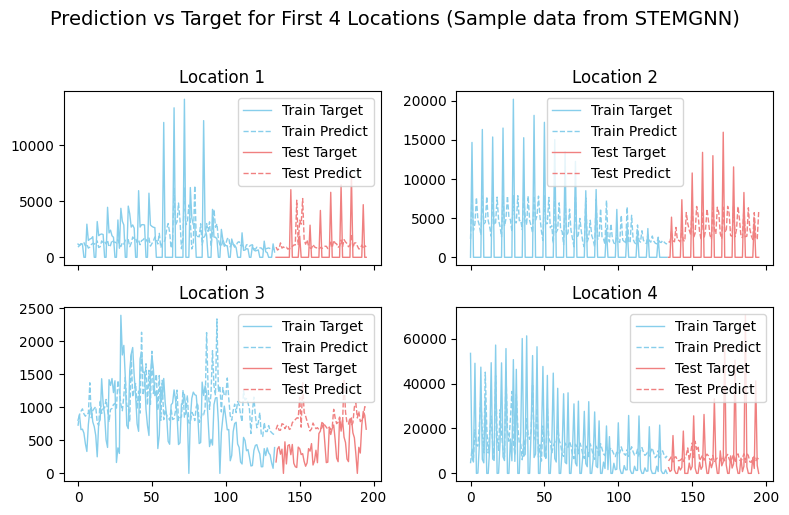

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load train data
target_train = np.loadtxt('/home/rxq7391/stats_461/StemGNN/output/daily/confirmed_state/train/target.csv', delimiter=',')
target_test = np.loadtxt('/home/rxq7391/stats_461/StemGNN/output/daily/confirmed_state/test/target.csv', delimiter=',')
predict_train = np.loadtxt('/home/rxq7391/stats_461/StemGNN/output/daily/confirmed_state/train/predict.csv', delimiter=',')
predict_test = np.loadtxt('/home/rxq7391/stats_461/StemGNN/output/daily/confirmed_state/test/predict.csv', delimiter=',')

print(f"Train - Predict shape: {predict_train.shape}, Target shape: {target_train.shape}")
print(f"Test - Predict shape: {predict_test.shape}, Target shape: {target_test.shape}")

# Plot for first 8 locations, train followed by test with different colors
n_loc = min(4, predict_train.shape[1])
cols = 2
rows = int(np.ceil(n_loc / cols))

fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 2.5*rows), sharex=True)
axes = axes.ravel()

for i in range(n_loc):
    ax = axes[i]
    # Plot train data with softer blue
    ax.plot(range(len(target_train)), target_train[:, i], label='Train Target', linewidth=1, color='skyblue')
    ax.plot(range(len(predict_train)), predict_train[:, i], label='Train Predict', linewidth=1, linestyle='--', color='skyblue')
    # Plot test data with softer red
    start_test = len(target_train)
    ax.plot(range(start_test, start_test + len(target_test)), target_test[:, i], label='Test Target', linewidth=1, color='lightcoral')
    ax.plot(range(start_test, start_test + len(predict_test)), predict_test[:, i], label='Test Predict', linewidth=1, linestyle='--', color='lightcoral')
    ax.set_title(f'Location {i+1}')
    ax.legend()

# Hide extra subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.suptitle('Prediction vs Target for First 4 Locations (Sample data from STEMGNN)', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()